In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Gender       891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df[:5]

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
df = df.drop(columns=["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"])

In [9]:
df[:5]

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [13]:
# The total number of survived
df["Survived"].sum()

342

In [14]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
import seaborn as sns

<Axes: xlabel='Survived', ylabel='count'>

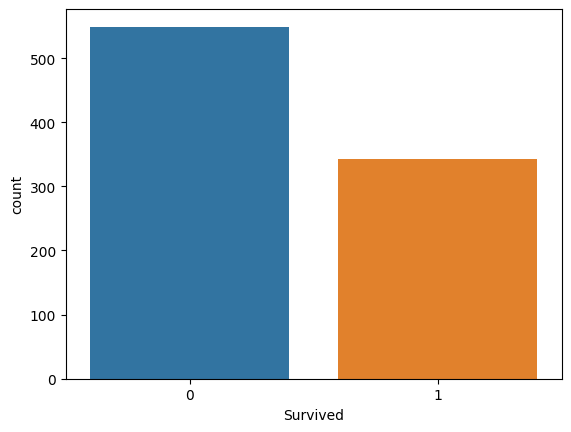

In [12]:
sns.countplot(x=df["Survived"])

In [21]:
dfm = df[["Gender", "Survived"]].groupby("Gender").value_counts()

In [22]:
dfm

Gender  Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [56]:
pivot_table = pd.pivot_table(df, values=["Survived"], index=["Gender"], columns=["Pclass"], aggfunc=np.sum)

In [67]:
df["Survived"].count()

891

In [68]:
pivot_percent = pivot_table / df["Survived"].sum()

In [57]:
pivot_table 

Survived        
Pclass        1   2   3
Gender                 
female       91  70  72
male         45  17  47

<Axes: ylabel='Gender'>

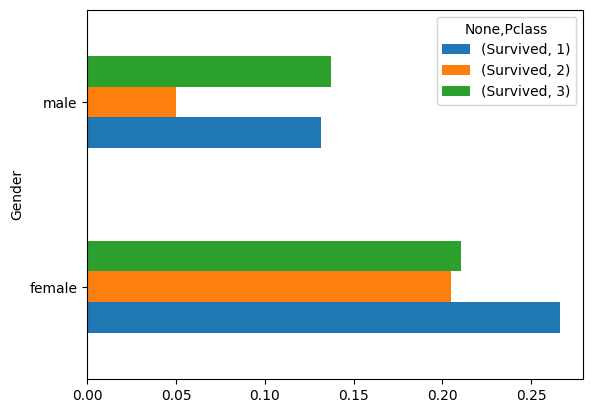

In [69]:
pivot_percent.plot.barh()

In [80]:
df['age_bins'] = pd.cut(x=df['Age'], bins=[0, 18, 36, 54,
                                          72, 90])

In [86]:
survival_rate = df.pivot_table(index=['age_bins', 'Pclass'], columns='Gender', values='Survived', aggfunc='mean')


In [87]:
survival_rate

Gender             female      male
age_bins Pclass                    
(0, 18]  1       0.909091  0.800000
         2       1.000000  0.600000
         3       0.511628  0.215686
(18, 36] 1       0.974359  0.527778
         2       0.930233  0.068966
         3       0.511111  0.150943
(36, 54] 1       0.964286  0.350000
         2       0.866667  0.050000
         3       0.076923  0.081081
(54, 72] 1       1.000000  0.105263
         2       0.500000  0.166667
         3       1.000000  0.000000
(72, 90] 1            NaN  1.000000
         3            NaN  0.000000